
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Matías Sasso

**Rol**: 201704523-K

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [8]:
digits.tail()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9
1796,0,0,10,14,8,1,0,0,0,2,...,0,0,1,8,12,14,12,1,0,8


In [9]:
print("Tipo del dataframe digits:\n")
type(digits)

Tipo del dataframe digits:



pandas.core.frame.DataFrame

In [10]:
dimensiones = digits.shape
print(f"Dimensiones del dataframe digits:{dimensiones}")

Dimensiones del dataframe digits:(1797, 65)


##### De esta manera, se obtiene que el dataframe "digits" posee 1797 filas y 65 columnas, por lo tanto se deduce que existen 1797 regiistro por clase, veamos los posibles valores nulos:

In [11]:
# ocupar comando .notnull().all(axis=1)
digits.notnull().all(axis=1).head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

In [12]:
# ocupando el método masking, nos encargamos de los posibles valores nulos del dataframe
mask = lambda digits: digits.notnull().all(axis=1)
digits = digits[mask]
digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


##### Finalmente echemos un vistazo a cuanta memoria estamos utilizando:

In [13]:
digits.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [14]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

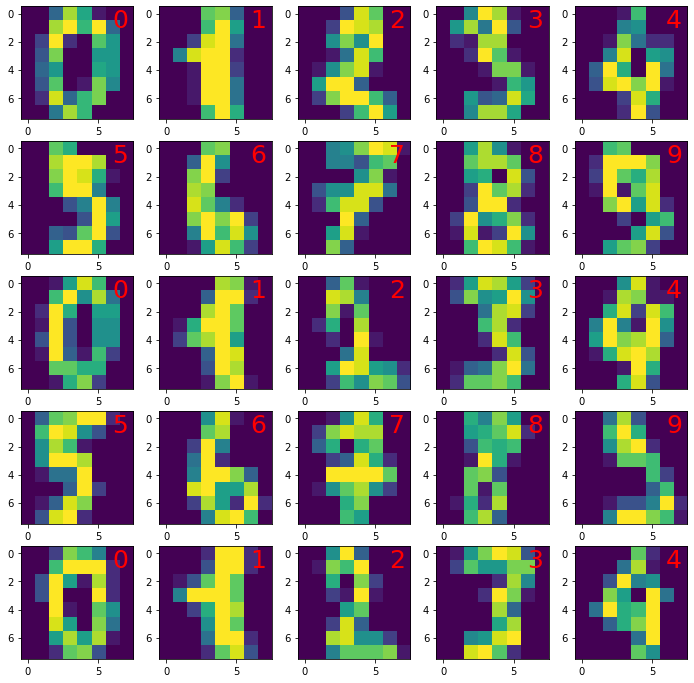

In [15]:
nx, ny = 5, 5
fig = plt.figure(figsize=(12,12))
n=0
for i in range(1,26):
    etiqueta=['0','1','2','3','4','5','6','7','8','9']
    img=digits_dict["images"][i-1]
    fig.add_subplot(nx,ny,i)
    plt.imshow(np.reshape((img),(8,8)))
    plt.text(6,1,etiqueta[n],fontsize=25,color='r')
    n+=1
    if n==(len(etiqueta)):
        n=0
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `sklearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [16]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [17]:
from sklearn.metrics import confusion_matrix
from metrics_classification import summary_metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split    #importamos los modelos y herramientas a ocupar
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from time import time 
from sklearn import svm

model_LR = LogisticRegression()
model_neigh = KNeighborsClassifier()                                               #instanciamos los modelos
model_RandomF = RandomForestClassifier(max_depth=5,n_estimators=8,max_features=1)
model_SVC = svm.SVC(probability=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Se muestran las dimensiones de los respectivos conjuntos

print('Dimensiones de los conjuntos a utilizar:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Dimensiones de los conjuntos a utilizar:

numero de filas data original :  1797
numero de filas train set     :  1437
numero de filas test set      :  360


In [19]:
tiempo_inicial1=time()
model_LR.fit(X_train,y_train) #ajustamos el modelo de regresión logistica
tiempo_final1=time()
tiempo_ejecucion1= tiempo_final1-tiempo_inicial1
print(f"Tiempo de ajuste: {tiempo_ejecucion1} segundos (Regresión Logística)")

Tiempo de ajuste: 0.8065333366394043 segundos (Regresión Logística)


C:\Users\matia\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
tiempo_inicial2=time()
model_RandomF.fit(X_train,y_train)  #ajustamos el modelo RandomForest
tiempo_final2=time()
tiempo_ejecucion2=tiempo_final2-tiempo_inicial2
print(f"Tiempo de ajuste: {tiempo_ejecucion2} segundos (Random Forest)")

Tiempo de ajuste: 0.035961151123046875 segundos (Random Forest)


In [21]:
tiempo_inicial3=time()
model_neigh.fit(X_train,y_train)          #ajustamos el modelo K-Nearest Neighbors
tiempo_final3=time()
tiempo_ejecucion3=tiempo_final3-tiempo_inicial3
print(f"Tiempo de ajuste: {tiempo_ejecucion3} segundos (K-Nearest Neighbors)")

Tiempo de ajuste: 0.04397249221801758 segundos (K-Nearest Neighbors)


In [22]:
tiempo_inicial4=time()
model_SVC.fit(X_train,y_train)             #ajustamos el modelo SVC
tiempo_final4=time()
tiempo_ejecucion4=tiempo_final4-tiempo_inicial4
print(f"Tiempo de ajuste: {tiempo_ejecucion4} segundos (SVC)")

Tiempo de ajuste: 0.608665943145752 segundos (SVC)


##### Luego el modelo con el menor tiempo de ajuste es el modelo Random Forest.

In [23]:
#para el modelo SVC

y_true=list(y_test)

y_pred=list(model_SVC.predict(X_test))

print("\n Matriz de confusión:\n")
print(confusion_matrix(y_true,y_pred))

df4 = pd.DataFrame({
        'y':y_true,
        'yhat':y_pred
})

df4_metrics = summary_metrics(df4)

print("\nValores Metricas SVC:")
print("")
print(df4_metrics)



 Matriz de confusión:

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]

Valores Metricas SVC:

   accuracy  recall  precision  fscore
0    0.9861  0.9866     0.9872  0.9868


In [24]:
#para el modelo LogisticRegression

y_true=list(y_test)

y_pred=list(model_LR.predict(X_test))

print("\n Matriz de confusión:\n")
print(confusion_matrix(y_true,y_pred))

df1 = pd.DataFrame({
        'y':y_true,
        'yhat':y_pred
})

df1_metrics = summary_metrics(df1)

print("\nValores Metricas LogisticRegression:")
print("")
print(df1_metrics)



 Matriz de confusión:

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]

Valores Metricas LogisticRegression:

   accuracy  recall  precision  fscore
0    0.9694  0.9722     0.9709  0.9714


In [25]:
#para el modelo RandomForest 

y_true=list(y_test)

y_pred1=list(model_RandomF.predict(X_test))

y_pred2=[int(i) for i in y_pred1]

print("\n Matriz de confusión:\n")
print(confusion_matrix(y_true,y_pred2))

df2 = pd.DataFrame({
        'y':y_true,
        'yhat':y_pred2
})

df2_metrics = summary_metrics(df2)

print("\nValores Metricas Random Forest:")
print("")
print(df2_metrics)



 Matriz de confusión:

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 25  1  0  0  0  1  0  0  1]
 [ 0  1 30  0  0  1  0  0  1  0]
 [ 0  1  0 24  0  2  3  0  3  1]
 [ 0  0  0  0 45  0  1  0  0  0]
 [ 1  0  0  1  0 40  3  0  0  2]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 2  1  0  0  2  1  0 28  0  0]
 [ 0  3  1  3  0  1  0  1 20  1]
 [ 3  1  0  3  0  2  0  3  1 27]]

Valores Metricas Random Forest:

   accuracy  recall  precision  fscore
0    0.8472  0.8443     0.8433  0.8404


In [26]:
#para el modelo K-Neighbors Classifier

y_true=list(y_test)

y_pred1=list(model_neigh.predict(X_test))

y_pred2=[int(i) for i in y_pred1]

print("\n Matriz de confusión:\n")
print(confusion_matrix(y_true,y_pred2))

df3 = pd.DataFrame({
        'y':y_true,
        'yhat':y_pred2
})

df3_metrics = summary_metrics(df3)

print("\nValores Metricas K-Neighbors Classifier:")
print("")
print(df3_metrics)



 Matriz de confusión:

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]

Valores Metricas K-Neighbors Classifier:

   accuracy  recall  precision  fscore
0    0.9861  0.9878     0.9879  0.9878


##### Al comparar los valores de las respectivas métricas por modelo, es posible observar que el modelo SVC es el mejor dado que es el que tiene valores más cercanos a 1 en sus métricas, por lo cual a mi parecer es mejor escoger el modelo SVC.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asociados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [27]:
# cross_val_score

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator=model_SVC,
                            X=X_train,
                            y=y_train,
                            scoring="accuracy",
                            cv=10)

In [28]:
accuracy= [round(x,2) for x in accuracy]
print('Precisiones: {} '.format(accuracy))
print('Precisión Promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(accuracy),
                                          np.std(accuracy)))

Precisiones: [0.99, 0.99, 0.99, 0.98, 0.99, 0.99, 1.0, 0.99, 0.98, 1.0] 
Precisión Promedio:  0.990 +/-  0.006


##### Ahora veamos la curva de validación:

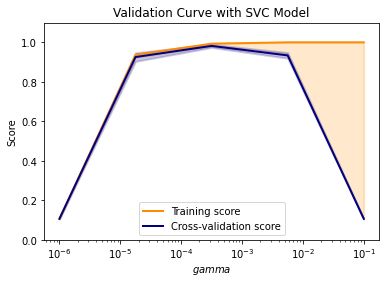

In [29]:
# Curva de Validación
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6,-1,5)

train_scores, test_scores = validation_curve(
    SVC(),X_train,y_train,param_name="gamma",param_range=param_range,
    scoring="accuracy",n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)                       #se replica el ejemplo visto en el link 
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC Model")
plt.xlabel(r"$gamma$")
plt.ylabel("Score")
plt.ylim(0.0,1.1)

lw=2

plt.semilogx(param_range, train_scores_mean, label="Training score",
            color="darkorange",lw=lw)
plt.fill_between(param_range, test_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color="darkorange",lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
            color="navy",lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

####  

#### Posteriormente, veamos la curva ROC asociada:

In [30]:
# Curva AUC-ROC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier 
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn import svm

In [31]:
# función destinada para obtener la gráfica ROC

def plot_auc_roc_curve(fpr,tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='roc')
    plt.plot([0,1], [0,1], color='navy',lw=lw,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Operating Characteristic Curve (ROC)")
    plt.legend(loc="lower right")
    plt.show()

In [32]:
X_sec = X
Y_sec = []

model_svc2 = SVC(probability=True)

for k in range(10):
    Y_sec.append(np.array(pd.Series(y).apply(lambda x: 1 if x ==k else 0)))

In [33]:
# split dataset
X_sec_train, X_sec_test, Y_sec_train, Y_sec_test = train_test_split(X_sec, Y_sec[0], test_size=0.3, random_state = 2)

# ajustar modelo 
model_svc2.fit(X_sec_train,Y_sec_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
# calcular score AUC

probs = model_svc2.predict_proba(X_sec_test)    # predecir probabilidades para X_sec_test
probs_tp = probs[:, 1]                   # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(Y_sec_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

AUC: 1.00


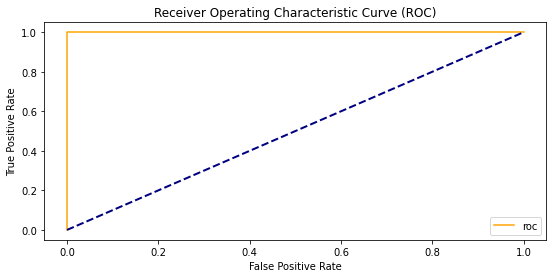

In [35]:
# calcular curva ROC

fpr, tpr, thresholds = roc_curve(Y_sec_test, probs_tp) # obtener curva ROC
plot_auc_roc_curve(fpr, tpr)

##### Dado que el área encerrada por la curva ROC (es decir AUC), tiene valor igual a 1.00, se puede concluir que el modelo será bastante acertado a la hora de distinguir los datos que corresponden a los falsos positivos y a los verdaderos positivos.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una reducción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


#### Partimos haciendo la selección de atributos

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Separamos las columnas objetivo

x_training = digits.drop(['target',], axis=1)
y_training = digits['target']

# Aplicando el algoritmo univariante de prueba F.

k = 10 # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

C:\Users\matia\miniconda3\envs\mat281\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\Users\matia\miniconda3\envs\mat281\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [37]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['c10', 'c20', 'c21', 'c26', 'c28', 'c33', 'c34', 'c36', 'c42', 'c43']

##### Ya hecha la selección, procedemos a la extracción de atributos:

In [38]:
from sklearn.preprocessing import StandardScaler

features = ['c10', 'c20' , 'c21', 'c26' , 'c28' , 'c33' , 'c34' , 'c36' , 'c42' , 'c43']

x = digits.loc[:, features].values
y = digits.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

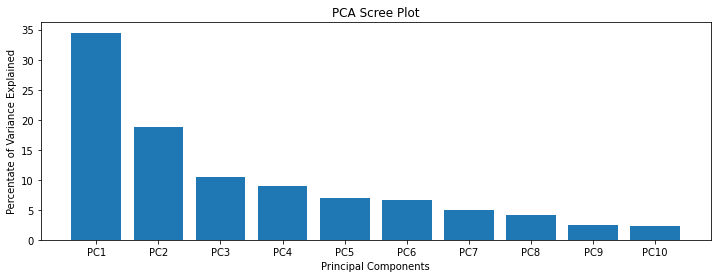

In [39]:
# ocupamos el algoritmo PCA para poder visualizar la varianza explicada por cada componente 
# y ajustamos el modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7' , 'PC8' , 'PC9' , 'PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Components')
plt.title('PCA Scree Plot')
plt.show()

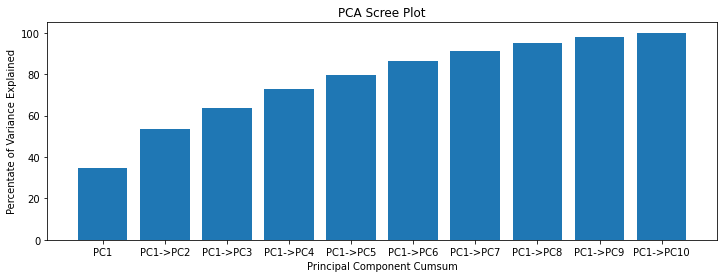

In [40]:
# graficamos la varianza por la suma acumulada de las componentes

percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1->PC2', 'PC1->PC3', 'PC1->PC4' , 'PC1->PC5', 
           'PC1->PC6', 'PC1->PC7', 'PC1->PC8', 'PC1->PC9', 'PC1->PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

##### A partir del gráfico podemos notar que un poco más del 80% de la varianza explicada de las componentes se puede explicar considerando solamente las 6 componentes principales. 

In [41]:
df2 = pd.DataFrame()
                         
for i in features:               #se construye otro dataframe con las componentes principales de "digits"
    df2[i]=digits[i]

In [42]:
df2.head()

,c10,c20,c21,c26,c28,c33,c34,c36,c42,c43
0,13,0,11,12,0,5,8,0,11,0
1,0,16,6,15,16,0,1,16,1,16
2,3,8,16,1,15,1,8,15,16,16
3,13,13,0,2,11,0,0,12,0,0
4,0,6,2,7,0,5,16,0,15,16


In [43]:
dimensiones = df2.shape
print(f"Dimensiones del nuevo dataframe:{dimensiones}")

Dimensiones del nuevo dataframe:(1797, 10)


In [44]:
df2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1796
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c10     1797 non-null   int32
 1   c20     1797 non-null   int32
 2   c21     1797 non-null   int32
 3   c26     1797 non-null   int32
 4   c28     1797 non-null   int32
 5   c33     1797 non-null   int32
 6   c34     1797 non-null   int32
 7   c36     1797 non-null   int32
 8   c42     1797 non-null   int32
 9   c43     1797 non-null   int32
dtypes: int32(10)
memory usage: 84.2 KB


##### Podemos observar que la memoria utilizada por el nuevo dataframe es considerablemente menor a la del original. Veamos que tanto se demora en ajustarse el modelo SVC en este dataframe.

In [45]:
model_SVC2 = SVC()

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.2, random_state=42)

In [47]:
tiempo_inicial = time()
model_SVC2.fit(X_train2,y_train2)             #ajustamos el modelo SVC y medimos el tiempo de ajuste
tiempo_final = time()
tiempo_ejecucion = tiempo_final-tiempo_inicial
print(f"Tiempo de ajuste: {tiempo_ejecucion} segundos (SVC2)")

Tiempo de ajuste: 0.12792634963989258 segundos (SVC2)


C:\Users\matia\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
diferencia_de_tiempo = tiempo_ejecucion4 - tiempo_ejecucion
print(f"Diferencia en el tiempo de ajuste entre los modelos: {diferencia_de_tiempo}")

Diferencia en el tiempo de ajuste entre los modelos: 0.4807395935058594


##### Luego, existe una diferencia de apoximadamente medio segundo entre los ajustes de los modelos con el dataframe "digits" y el dataframe que solo contiene a las componentes principales de éste. Es posible notar que con el dataframe original, el modelo se demora aproximadamente 6 veces más que con el dataframe de las 10 componentes principales.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [49]:
def mostrar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = model.predict(X_test)

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

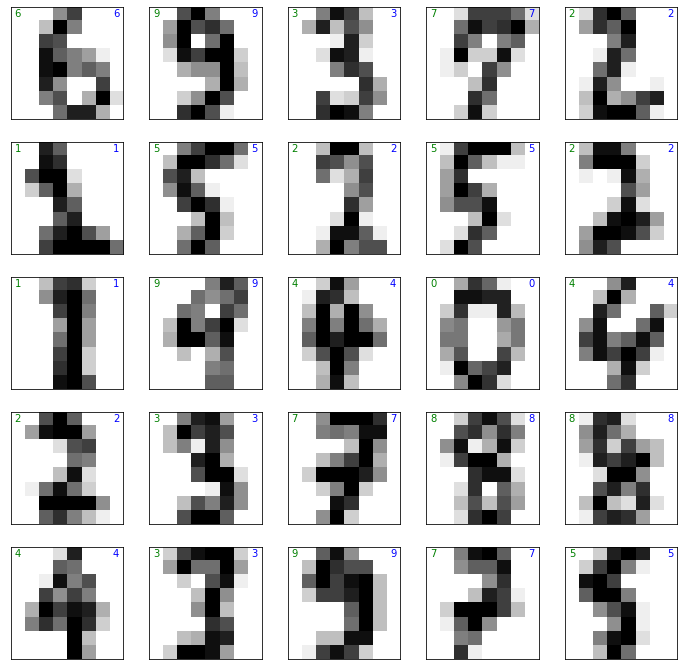

In [50]:
mostrar_resultados(digits,SVC(),label="correctos")

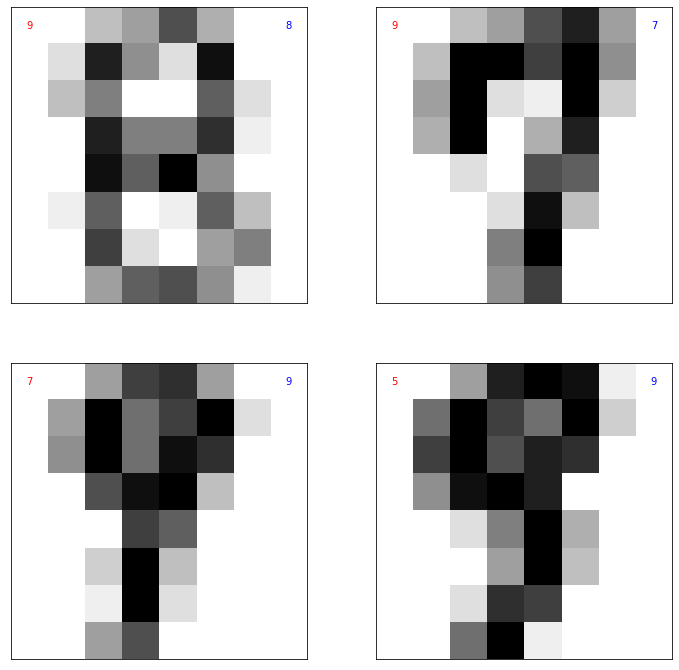

In [51]:
mostrar_resultados(digits,SVC(),nx=2,ny=2,label="incorrectos")

##### Las fallas se pueden explicar por la similaridad que tienen las formas con otros números, es decir, algunas formas se parecen más a otros números que a los valores reales, esta situación es análoga a cuando una persona escribe un número determinado y otra persona al ver dicha cifra interpreta otra, como por ejemplo algunas personas al escribir el número 3, este puede parecer un 9, o también cuando alguien escribe un cinco con la cola tan cerrada que éste parece un 6.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

##### Es posible observar que el modelo fue bastante acertado en la predicción de los dígitos entregados , esta aseveración se sustenta gracias a los altos valores obtenidos por el modelo a través de los distintos criterios utilizados en la presente tarea como por ejemplo: la curva ROC, las métricas en relación a las distintas clasificaciones de los datos, selección y extracción de atributos, etc, y por supuesto, en base a los resultados obtenidos.

##### En relación a mis trabajos futuros, tomé ramos electivos de la malla estadística de la carrera junto a algunos de informática ligados a machine learning, además este semestre me encuentro rindiendo el ramo de Inferencia, a raíz de esto, si bien no tengo muy claro cómo serán mis futuros trabajos, sí sé que éstos estarán ligados a estudios estadísticos de determinadas situaciones, por lo que, tanto los contenidos vistos en este ramo como el manejo en python me serán de mucha utilidad en el futuro. 

##### Finalmente, entre las principales dificultades que me encontré en la tarea está comprender algunos códigos de los ejemplos del ejercicio 4. Esa dificultad la superaré estudiando más al respecto de los tópicos de machine learning, dado que si bien siento que aprendí mucho en este ramo, me falta dominar la teoría detrás de la mayoría de modelos junto a un mayor manejo en python respecto a estas tematicas.  